# LinkedIn Recommendation System

## Dataset download

This project uses the **“1.3M LinkedIn Jobs and Skills 2024”** dataset available on [Kaggle](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024).

The dataset contains over **1.3 million LinkedIn job postings** collected in 2024, including detailed information on job titles, descriptions, companies, and associated skills. It is used to train and evaluate our job recommendation system.

### Download Options

You can obtain the dataset in two ways:

1. **Using the Kaggle API (Recommended)** — automatic download and extraction.  
2. **Manual Download** — download the ZIP file directly from the dataset page and extract it yourself.


### Option 1 — Using the Kaggle API

To use the Kaggle API, ensure you have the Kaggle CLI installed and configured.

```bash
# Install Kaggle CLI
pip install kaggle

# Move your Kaggle API key (kaggle.json) into place
mkdir -p ~/.kaggle
mv ~/Downloads/kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
```

Once configured, you can run the provided script to automatically download and unzip the dataset into the `data/` folder.

```bash
chmod +x ./download_linkedin_dataset.sh
./download_linkedin_dataset.sh
```

This script:
- Creates the `data/` folder if it does not exist.
- Downloads the dataset from Kaggle.
- Extracts the contents.
- Removes the ZIP file after extraction.

### Option 2 — Manual Download

If you prefer not to use the Kaggle API, you can manually download the dataset from:

🔗 **[https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024)**

After downloading:
1. Extract the ZIP file.  
2. Move all extracted files into the `data/` directory in your project.

### Notes
- Ensure your Kaggle API credentials (`kaggle.json`) are correctly configured in `~/.kaggle/`.
- The dataset is distributed under the **ODC Attribution License (ODC-By)**.
- The total size is ~2 Gb (~1.3M entries), so the download may take several minutes depending on your connection.

## Data preparation

### Load and Inner Join

We load two CSVs:

- `job_postings_df` from `./data/linkedin_job_postings.csv`
- `job_summary_df` from `./data/job_summary.csv`
- `job_skills_df` from `./data/job_skills.csv`

We then **inner join** on the unique key `job_link`:

- `jobs_df = pd.merge(job_postings_df, job_skills_df, on="job_link", how="inner")`
- `jobs_df = pd.merge(jobs_df, job_summary_df, on="job_link", how="inner")`

This keeps only postings that exist in every sources and ensures aligned rows across tables.


In [ ]:
import pandas as pd

# Load the datasets
job_skills_df = pd.read_csv('./data/job_skills.csv')
#job_summary_df = pd.read_csv('./data/job_summary.csv')
job_postings_df = pd.read_csv('./data/linkedin_job_postings.csv')


In [ ]:
job_skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [ ]:
#job_summary_df.head()

In [ ]:
job_postings_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [ ]:
jobs_df = pd.merge(job_postings_df, job_skills_df, on='job_link', how='inner')
#jobs_df = pd.merge(jobs_df, job_summary_df, on='job_link', how='inner')

In [ ]:
jobs_df.describe()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
count,1296381,1296381,1296381,1296381,1296381,1296381,1296372,1296362,1296381,1296381,1296381,1296381,1296381,1296381,1294296
unique,1296381,722728,1,1,1,565695,88995,28791,6,1018,4,1923,2,3,1287101
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,North Carolina,United States,Account Executive,Mid senior,Onsite,"Front Counter, DriveThru, Outside Order Taker,..."
freq,1,573487,1296381,1296381,1296381,7315,40049,12580,459354,9495,1105410,19465,1155276,1285565,169


In [ ]:
#input_cols = ['job_link', 'job_title', 'job_location', 'search_country', 'job_skills', 'job_description']
input_cols = ['job_link', 'job_title', 'job_location', 'search_country', 'job_skills']

### Row Filtering

We remove rows that do not contain the required NLP outputs and rows flagged as in-progress:

- Drop entries **without NER** results.
- Drop entries **without summary**.
- Drop entries where **`is_being_worked` is `True`**.

This reduces noise and guarantees each training sample has complete text features.

In [ ]:
jobs_df = jobs_df.loc[
    (jobs_df["is_being_worked"] == "f")
    & (jobs_df["got_summary"] == "t")
    & (jobs_df["got_ner"] == "t")
]

jobs_df = jobs_df[input_cols].dropna().reset_index(drop=True)

### Title Normalization and Reduction of Unique Values

We normalize `job_title` with a custom function:

1. **Lowercase** titles.
2. **Trim at the first dash**: keep text before `"-"` to collapse variants like  
   `Senior Software Engineer - Backend` → `senior software engineer`.
3. **Remove parenthetical fragments**: delete content inside `(...)`, e.g.  
   `data scientist (NLP)` → `data scientist`.
4. **Strip whitespace**.

**Effect:** Different textual variants map to a **single canonical form**, which **reduces the number of unique job titles** and stabilizes downstream grouping and modeling.


In [ ]:
def _clean_job_titles(job_title: str):
    job_title = job_title.lower()
    if '-' in job_title:
        job_title = job_title.split('-')[0].strip()
    job_title = job_title.split('(')[0].strip()
    return job_title.strip()

jobs_df['job_title'] = jobs_df['job_title'].astype(str).apply(_clean_job_titles)

### Skill Canonicalization and Reduction of Unique Values

We clean `job_skills` as a comma-separated list:

1. **Split by comma** and **strip** whitespace.
2. **Lowercase** each skill token.
3. **De-duplicate per posting** to avoid repeated skills.
4. **Sort tokens** so the per-row skill list has a consistent order.

We also track a **global set of unique skills** to measure coverage.

**Effect:** Canonicalization merges superficial variants and ordering differences, which **reduces both per-row and global unique skill counts**. This yields a more compact and reliable skill space.


In [ ]:
import re

# create a cleaned list of skills per job and a global unique skills array
def _clean_split_skills(skills_str: str):
    skills_str = skills_str.lower()
    parts = str(skills_str).split(',')
    unique = set()
    for part in parts:
        # remove non A-Za-z characters except whitespace, collapse spaces and strip ends
        c = re.sub(r'[^A-Za-z\s]', '', part)
        c = re.sub(r'\s+', ' ', c).strip()
        if c:
            unique.add(c)
    # return a deterministic, cleaned, ordered string
    ordered = sorted(unique)
    return ', '.join(ordered)

jobs_df['job_skills'] = jobs_df['job_skills'].astype(str).apply(_clean_split_skills)

In [ ]:
seen = set()
skills_array = []
for lst in jobs_df['job_skills']:
    for skill in lst.split(','):
        skill = skill.strip()
        if skill not in seen:
            seen.add(skill)
            skills_array.append(skill)

print(f"Jobs rows: {len(jobs_df)}, sample job_skills (first 5):\n", jobs_df['job_skills'].head())
print(f"Global unique skills count: {len(skills_array)}")
#skills_array[:20]

Jobs rows: 1294277, sample job_skills (first 5):
 0    bachelors degree, bd offerings, challenges, co...
1    bachelor of science in nursing, care managemen...
2    arithmetic skills, bending and kneeling abilit...
3    closing statements, communication, customer se...
4    bsn, diversity, equal opportunity employer, eq...
Name: job_skills, dtype: object
Global unique skills count: 2668580


### Location Cleaning and Reduction of Unique Values

We standardize `job_location` by **keeping only the part before the first comma**:

- Example: `San Diego, CA` → `San Diego`

**Effect:** This collapses formatting variants that differ only by state or country suffix. It **reduces the number of unique locations** and helps counter sparse geography fields while preserving city-level signal.

In [ ]:
jobs_df['job_location'].value_counts()

job_location
New York, NY                                 12562
London, England, United Kingdom              10879
Houston, TX                                  10317
Chicago, IL                                  10155
Los Angeles, CA                               9724
                                             ...  
Snyder County, PA                                1
Red Hill, SC                                     1
Rufford, England, United Kingdom                 1
Tantallon, Nova Scotia, Canada                   1
Aldinga Beach, South Australia, Australia        1
Name: count, Length: 28776, dtype: int64

In [ ]:
def _clean_location(loc: str):
    return loc.split(',')[0].strip()

jobs_df['job_location'] = jobs_df['job_location'].astype(str).apply(_clean_location)

In [ ]:
jobs_df.head()

,job_link,job_title,job_location,search_country,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,account executive,San Diego,United States,"bachelors degree, bd offerings, challenges, co..."
1,https://www.linkedin.com/jobs/view/registered-...,registered nurse,Norton Shores,United States,"bachelor of science in nursing, care managemen..."
2,https://www.linkedin.com/jobs/view/restaurant-...,restaurant supervisor,Sandy,United States,"arithmetic skills, bending and kneeling abilit..."
3,https://www.linkedin.com/jobs/view/independent...,independent real estate agent,Englewood Cliffs,United States,"closing statements, communication, customer se..."
4,https://www.linkedin.com/jobs/view/registered-...,registered nurse,Muskegon,United States,"bsn, diversity, equal opportunity employer, eq..."


In [ ]:
jobs_df.describe()

,job_link,job_title,job_location,search_country,job_skills
count,1294277,1294277,1294277,1294277,1294277
unique,1294277,314791,21036,4,1283123
top,https://www.linkedin.com/jobs/view/account-exe...,registered nurse,New York,United States,"coaching, dining room attendant, drinks, drive..."
freq,1,27530,14851,1103598,215


### Feature Set Used

After preprocessing, the working DataFrame includes the key fields required for analysis and modeling:

- `job_link` (primary key, post-join)
- `job_title` (normalized)
- `job_location` (city-only normalized)
- `search_country`
- `job_skills` (cleaned, sorted, de-duplicated)
- `job_description`

These fields form the basis for representation building and recommendation.


### Impact on Cardinality (Unique Values)

The following transformations are specifically designed to **reduce the number of unique values**:

- **Job titles:** lowercasing, dash-trim, and parenthesis removal collapse stylistic variants.
- **Skills:** lowercase normalization, de-duplication, and sorted lists produce canonical rows and reduce global skill vocabulary.
- **Locations:** truncation before the first comma unifies location strings.

This cardinality reduction improves:
- Statistical reliability of counts and co-occurrences.
- Memory usage and runtime.
- Model stability and generalization.

## Job-Job Network Construction

**Note:** I initially attempted to build a **Skills Co-occurrence Graph**. However, the resulting network was **too chaotic for any measure** to be useful.

Therefore, we have switched to a **Job-Job Network** approach.

We want to build a network where:
- **Nodes** are individual job postings.
- **Edges** connect jobs that share specific, meaningful skills.

In [ ]:
import networkx as nx
from itertools import combinations
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from collections import Counter

For computationnal purpose, I will restrain the dataset to the jobs of New York

In [ ]:
mask = jobs_df['job_location'].astype(str).str.lower().str.contains(r'\bnew york\b')
jobs_df_ny = jobs_df[mask].reset_index(drop=True)

print(f"Rows before: {len(jobs_df)}, after filtering to New York: {len(jobs_df_ny)}")

Rows before: 1294277, after filtering to New York: 16329


To avoid a "hairball" graph where everyone is connected to everyone (ex: "Communication" or "Excel"), we first identify and remove **generic skills**.

In [ ]:
# Subset for processing
N = 5000 # for speed
df_subset = jobs_df_ny.head(N).copy()

# Identify too common skills
all_skills = []
for skills_str in df_subset['job_skills']:
    skills = [s.strip() for s in str(skills_str).split(',') if s.strip()]
    all_skills.extend(skills)

# Remove skills represent in > 10% of jobs
skill_counts = Counter(all_skills)
threshold = len(df_subset) * 0.1
stop_skills = {skill for skill, count in skill_counts.items() if count > threshold}

print(f"Identified {len(stop_skills)} generic skills to ignore (e.g., {list(stop_skills)[:5]})")

Identified 11 generic skills to ignore (e.g., ['data analysis', 'attention to detail', 'project management', 'problem solving', 'customer service'])


### Building the Graph

We iterate through our jobs and connect them only if they share **at least 2 specific skills** (excluding the generic ones). This ensures the connections represent a genuine professional overlap.

In [ ]:
G_jobs = nx.Graph()

# Add nodes
for idx, row in df_subset.iterrows():
    G_jobs.add_node(idx, title=row['job_title'])

# Map specific skills to jobs
skill_to_jobs = {}
for idx, row in df_subset.iterrows():
    skills = [s.strip() for s in str(row['job_skills']).split(',') if s.strip()]
    for skill in skills:
        if skill not in stop_skills:
            skill_to_jobs.setdefault(skill, []).append(idx)

# Create edges (jobs sharing specific skills)
edge_weights = {}
for job_indices in skill_to_jobs.values():
    if len(job_indices) < 2: continue
    for u, v in combinations(job_indices, 2):
        if u > v: u, v = v, u
        edge_weights[(u, v)] = edge_weights.get((u, v), 0) + 1

# Add edges with weight >= 2
for (u, v), w in edge_weights.items():
    if w >= 2:
        G_jobs.add_edge(u, v, weight=w)

# Keep only the largest connected component
gcc_nodes = max(nx.connected_components(G_jobs), key=len)
GCC_jobs = G_jobs.subgraph(gcc_nodes).copy()
print(f"Graph built with {GCC_jobs.number_of_nodes()} jobs and {GCC_jobs.number_of_edges()} connections.")

Graph built with 4819 jobs and 363874 connections.


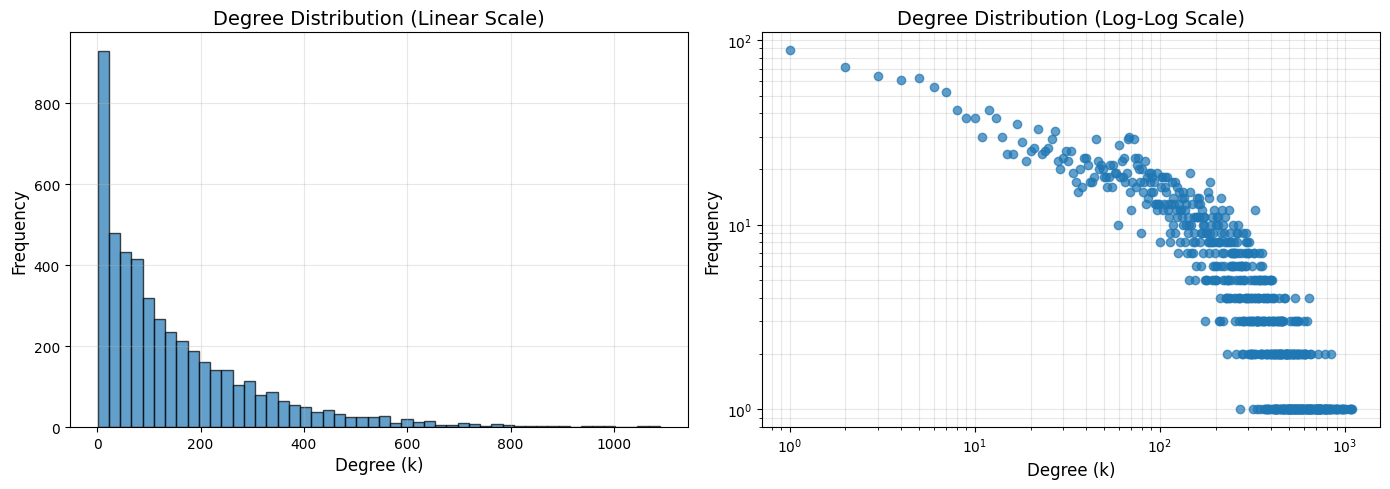

In [ ]:
# Degree distribution
degrees = dict(GCC_jobs.degree())
degree_values = list(degrees.values())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].hist(degree_values, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Degree (k)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Degree Distribution (Linear Scale)', fontsize=14)
axes[0].grid(alpha=0.3)

# Log-log scale for power-law detection
degree_counts = Counter(degree_values)
ks = sorted(degree_counts.keys())
counts = [degree_counts[k] for k in ks]

axes[1].loglog(ks, counts, 'o', markersize=6, alpha=0.7)
axes[1].set_xlabel('Degree (k)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Degree Distribution (Log-Log Scale)', fontsize=14)
axes[1].grid(alpha=0.3, which='both')

plt.tight_layout()
plt.show()

In [ ]:
degree_mean = np.mean(degree_values)
degree_median = np.median(degree_values)
degree_mode = max(set(degree_values), key=degree_values.count)
degree_min = min(degree_values)
degree_max = max(degree_values)
degree_std = np.std(degree_values)

print(f"Mean degree: {degree_mean:.2f}")
print(f"Median degree: {degree_median:.2f}")
print(f"Mode degree: {degree_mode}")
print(f"Min degree: {degree_min}")
print(f"Max degree: {degree_max}")
print(f"Standard deviation: {degree_std:.2f}")

#avg_clustering = nx.average_clustering(GCC_jobs)
#print(f"Average clustering coefficient: {avg_clustering:.3f}")

Mean degree: 151.02
Median degree: 98.00
Mode degree: 1
Min degree: 1
Max degree: 1089
Standard deviation: 159.98


Now that we have a clean network of jobs, we use the **Louvain algorithm** for weigthed graph to find clusters. In this context, a cluster represents a job family or a specific industry niche

In [ ]:
communities = nx.community.louvain_communities(GCC_jobs)
print(f"Detected {len(communities)} distinct job communities.")

Detected 12 distinct job communities.


### Semantic Profiling

To understand what each cluster represents, we can't just look at IDs. We need to look at the **content**.

We define a helper function that looks at a cluster and extracts:
1.  **Top Title Keywords:** What are these jobs called?
2.  **Top Skills:** What technical stack defines them?

In [ ]:
def profile_community(community_idx, communities_list, G, df_source):
    comm_nodes = list(communities_list[community_idx])
    
    # Collect titles and all skills (including generic ones for context)
    titles = [G.nodes[n].get('title', '') for n in comm_nodes]
    skills_pool = []
    for n in comm_nodes:
        s_str = df_source.loc[n, 'job_skills']
        skills_pool.extend([s.strip() for s in str(s_str).split(',') if s.strip()])

    # Extract keywords
    title_text = " ".join(titles).lower()
    stops = {'senior', 'junior', 'manager', 'associate', 'lead', 'director', 'vice', 'president', 'ii', 'iii'}
    words = [w for w in re.findall(r'\w+', title_text) if len(w) > 2 and w not in stops]
    
    print(f"\n=== Community {community_idx} ({len(comm_nodes)} jobs) ===")
    print(f"  Keywords:   {', '.join([w[0] for w in Counter(words).most_common(5)])}")
    print(f"  Top Skills: {', '.join([s[0] for s in Counter(skills_pool).most_common(6)])}")

sorted_comms = sorted(communities, key=len, reverse=True)
for i in range(len(sorted_comms)):
    profile_community(i, sorted_comms, GCC_jobs, jobs_df)


=== Community 0 (1139 jobs) ===
  Keywords:   account, sales, executive, supervisor, assistant
  Top Skills: communication, customer service, teamwork, leadership, communication skills, time management

=== Community 1 (717 jobs) ===
  Keywords:   nurse, registered, assistant, physician, teacher
  Top Skills: communication, customer service, teamwork, leadership, communication skills, time management

=== Community 2 (707 jobs) ===
  Keywords:   assistant, executive, attorney, analyst, administrative
  Top Skills: communication, customer service, teamwork, communication skills, leadership, problem solving

=== Community 3 (663 jobs) ===
  Keywords:   engineer, software, analyst, data, developer
  Top Skills: communication, customer service, teamwork, leadership, time management, communication skills

=== Community 4 (578 jobs) ===
  Keywords:   analyst, accountant, financial, accounting, assistant
  Top Skills: communication, customer service, communication skills, teamwork, leadershi

Some visualization of the communities ...

In [ ]:
G_sample = GCC_jobs.copy()
communities_set = communities
num_communities = len(communities_set)

partition = {}
for community_id, nodes in enumerate(communities_set):
    for node in nodes:
        partition[node] = community_id

cmap = plt.cm.get_cmap('tab10', num_communities) if num_communities <= 10 else plt.cm.get_cmap('viridis', num_communities)

# --- This is the list for node_color ---
nodes_color_com = [cmap(partition[node]) for node in G_sample.nodes()]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i}', markerfacecolor=cmap(i), markersize=10) for i in range(num_communities)]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sample, k=0.5, iterations=50)
nx.draw(G_sample, 
        pos, 
        node_size=100, node_color=nodes_color_com, 
        edge_color='lightgray',
        alpha=0.7, with_labels=False)
plt.legend(handles=legend_handles,
           title="Computed communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network - Computed louvain communities (louvain)")
plt.tight_layout()
plt.show()